# Visión por Computadora I #

## CEIA 21Co2025 ##

## TP1 - Parte 1 ##

José Luis Diaz (diazjoseluis@gmail.com)

Ricardo Silvera (rsilvera@thalu.com.ar)

José Aviani (jose.aviani@gmail.com)


---

### Importar lo necesario

In [1]:
%pip install cv
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Funciones auxiliares

In [3]:
def mostrar_histograma(img1, img2):
    """
    Muestra los histogramas de dos imágenes lado a lado.
    
    """
    colores = ('b', 'g', 'r')
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Primer histograma
    for i, color in enumerate(colores):
        axs[0].hist(img1[:, :, i].ravel(), 256, range=[0, 256], color=color, alpha=0.5, label=color)
    axs[0].set_title('Histograma 1 ')
    axs[0].legend()

    axs[0].set_xlabel('Valor de pixel')
    axs[0].set_ylabel('Frecuencia')

    # Segundo histograma
   
    for i, color in enumerate(colores):
        axs[1].hist(img2[:, :, i].ravel(), 256, range=[0, 256], color=color, alpha=0.5, label=color)
    axs[1].set_title('Histograma 2 ')
    axs[1].legend()

    axs[1].set_xlabel('Valor de pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

In [4]:
def mostrar2(img1, img2):
    """
    Muestra 2 imágnes para comparar.
    """
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title("Antes")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title("Despues")
    plt.axis("off")

    plt.show()

In [5]:
def procesarMuestra(file,percentil=100):
    """
    Procesa un amuestra con el algoritmo White Patch, muestra la imagen original y la transformada y sus respectivos histogramas
    """
    img1 =cv.imread('white_patch/'+file,cv.IMREAD_COLOR_RGB)
    img_corr = white_patch(img1,percentil)
    mostrar2(img1, img_corr)
    mostrar_histograma(img1, img_corr)


### Algoritmo White Patch

El algoritmo White Patch ajusta el balance de blancos de una imagen asumiendo que existe un píxel blanco puro (o casi blanco) en la escena original. Para ello, busca el valor máximo en cada canal (B, G, R) y escala todos los valores de ese canal de modo que el máximo alcance 255.


In [6]:
def white_patch(img, percentil=100):
    """Aplica el algoritmo White Patch para corrección de balance de blancos en una imagen a color (BGR)."""
    perc_vals = np.percentile(img.reshape(-1, 3), percentil, axis=0)
    print(perc_vals)
    img_corr = img / perc_vals * 255.0
    img_corr = np.clip(img_corr, 0, 255).astype(np.uint8)
    return img_corr

### Pruebas

[247. 157. 175.]


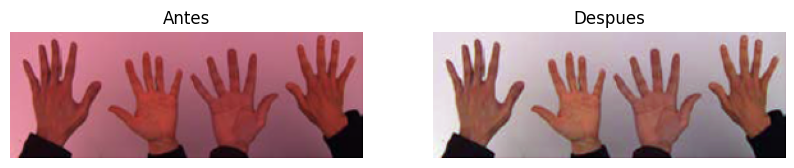

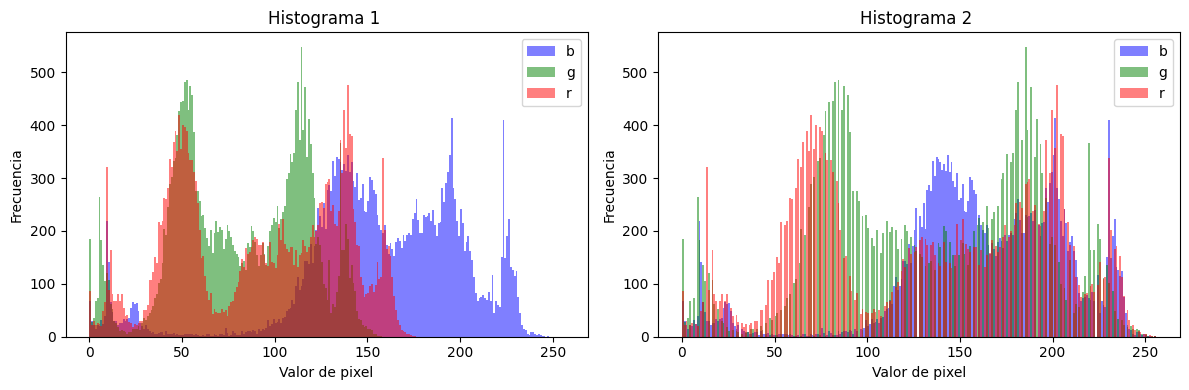

In [7]:
procesarMuestra('test_red.png')

[210. 250. 171.]


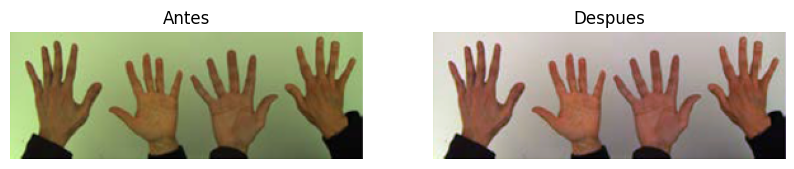

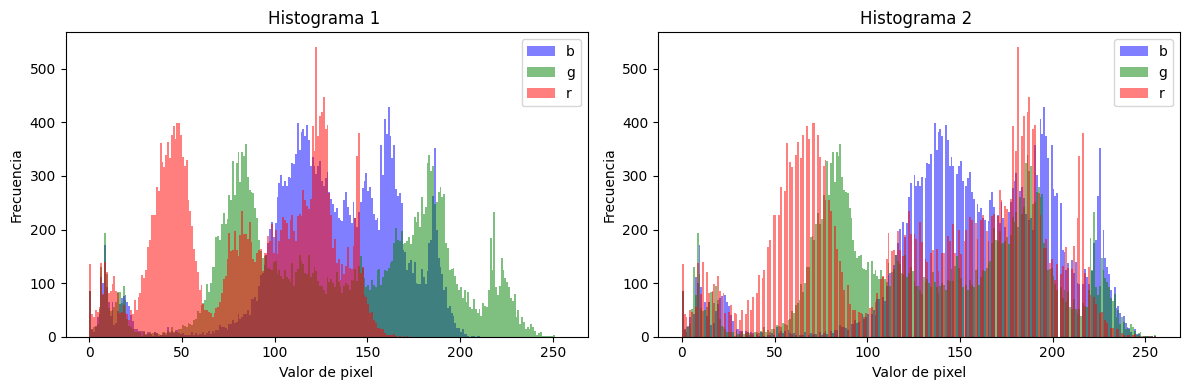

In [8]:
procesarMuestra('test_green.png')

[165. 138. 200.]


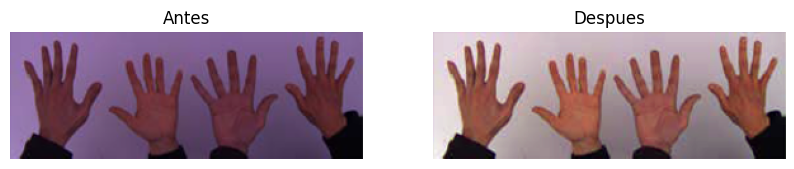

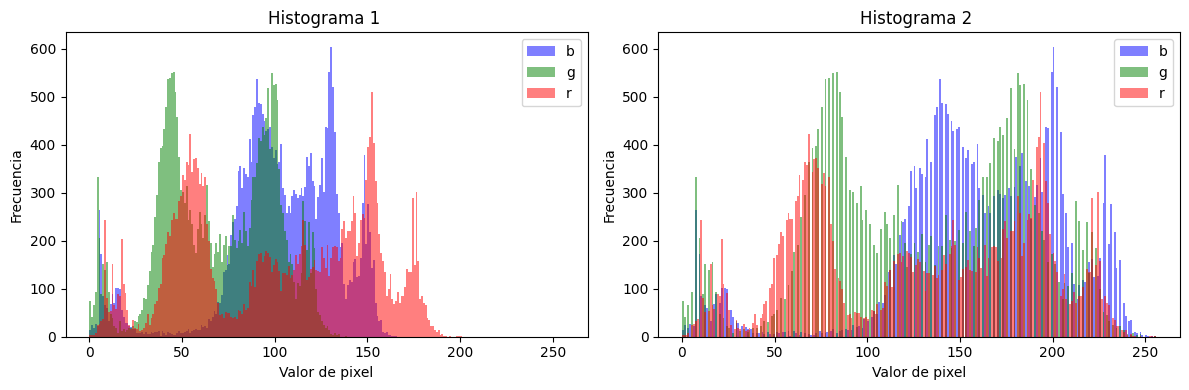

In [9]:
procesarMuestra('test_blue.png')


En las imágenes anteriores, el resultado es bueno, ya que los valores en los píxeles de los canales no predominantes tienen máximos por debajo de 200 y se concentran en la zona de tonos medios. Al escalarlos, se logra compensar el color predominante en la imagen original y se observa un desplazamiento casi homogéneo hacia la derecha en los canales no predominantes.

En las dos imágenes anteriores, se observa en los histogramas que los valores se concentran principalmente en la zona de sombras, por debajo de 100. Debido a este desequilibrio, los valores máximos se encuentran alejados de la media, lo que dificulta una adecuada compensación en los canales.

Por ello, se optará por utilizar el percentil 98 para excluir los valores atípicos y facilitar un mayor desplazamiento en la escala de valores.

[ 87. 242. 118.]


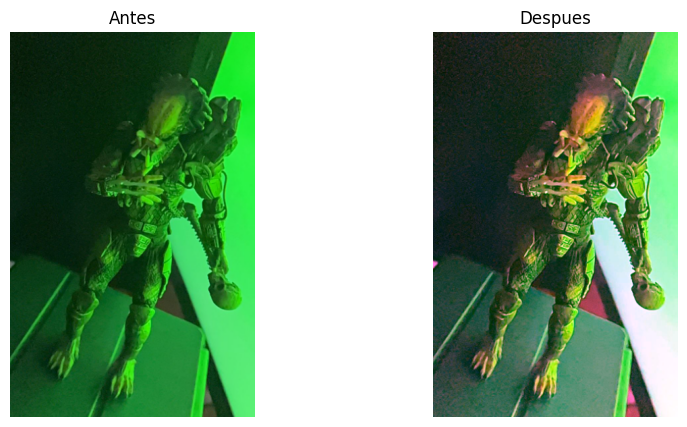

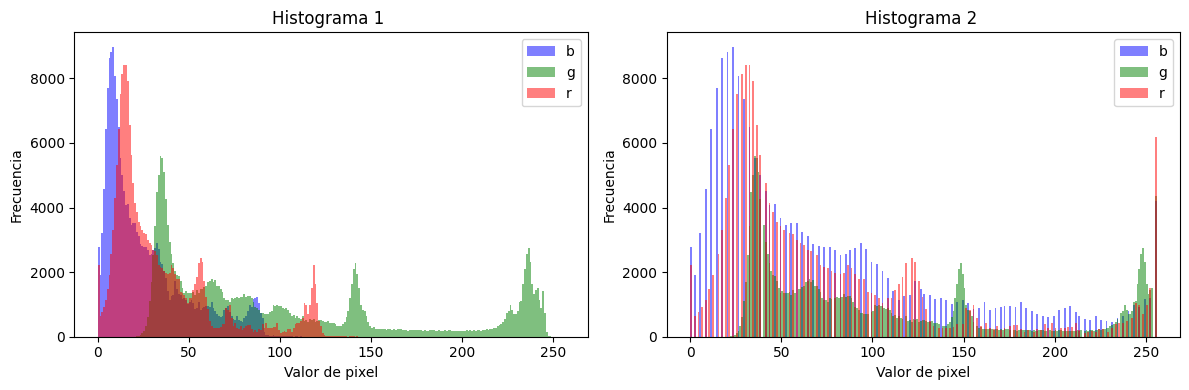

In [10]:
procesarMuestra('wp_green.png',98)

[255.  66.  99.]


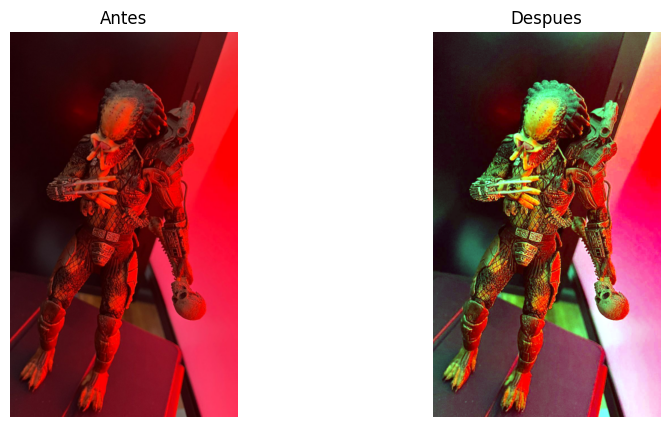

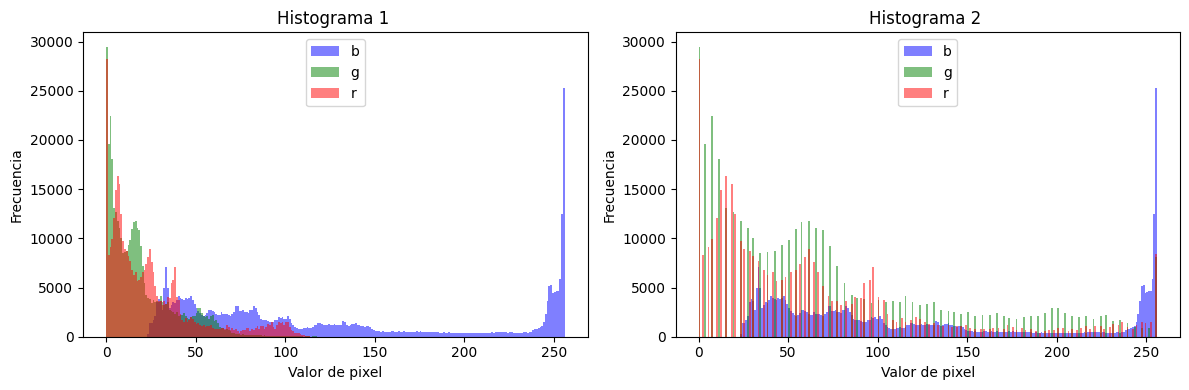

In [11]:
procesarMuestra('wp_red.png',98)

En los dos casos anteriores, se observa una concentración muy marcada en los extremos. Al aplicar el percentil 98, no se logra un cambio significativo, ya que sigue siendo un valor alto que no desplaza los valores en la parte izquierda del histograma. Para obtener un mayor aumento en los valores bajos, utilizamos el percentil 95; sin embargo, al realizar el escalado, los valores ubicados en la derecha del histograma se saturan. Esto se puede observar en las áreas con "manchas" rojas, verdes y azules que aparecen en las imágenes resultantes.

[ 30. 255.  24.]


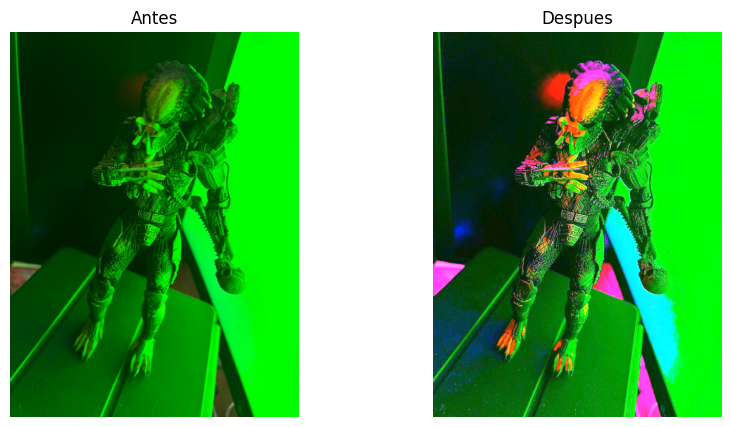

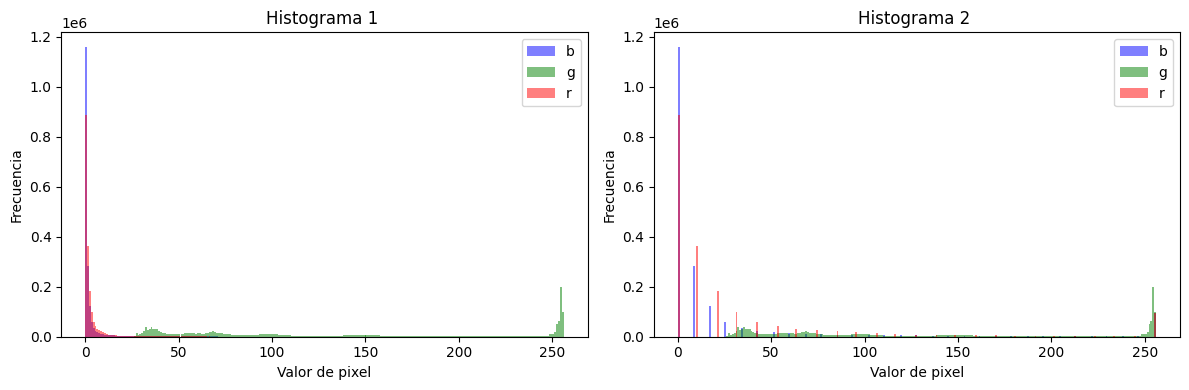

In [12]:
procesarMuestra('wp_green2.jpg',95)

[255.  60.  90.]


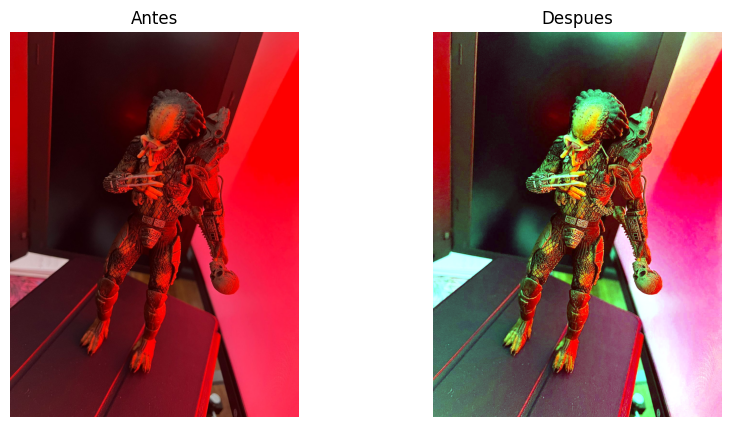

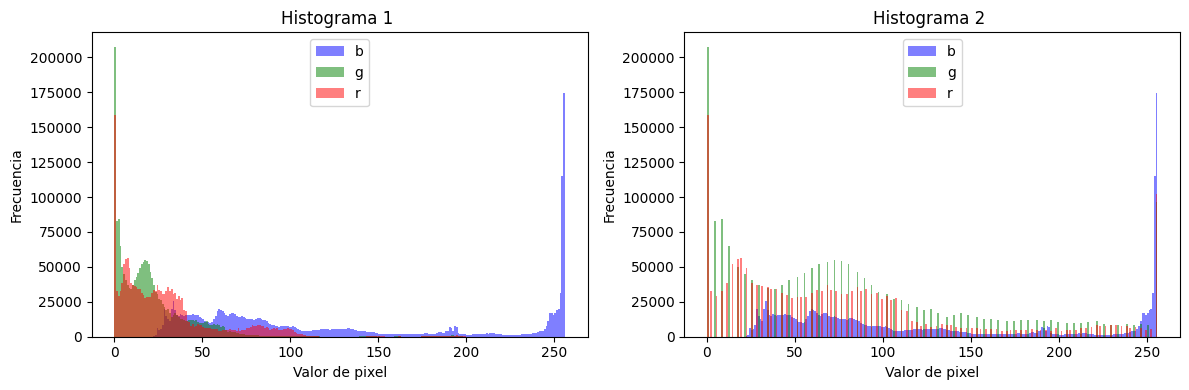

In [13]:
procesarMuestra('wp_red2.jpg',95)

[ 56.  51. 252.]


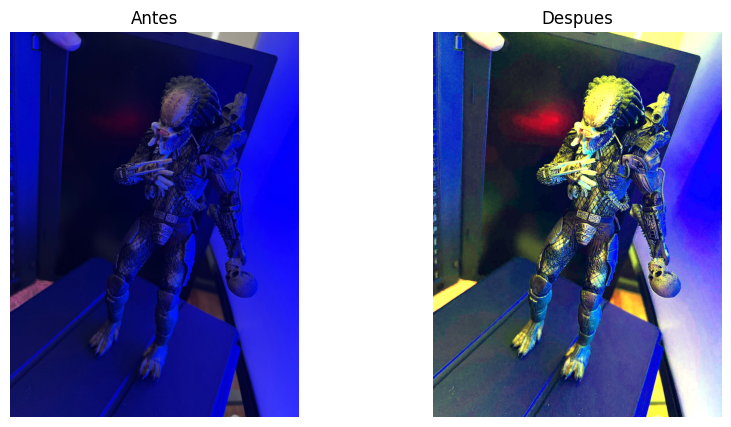

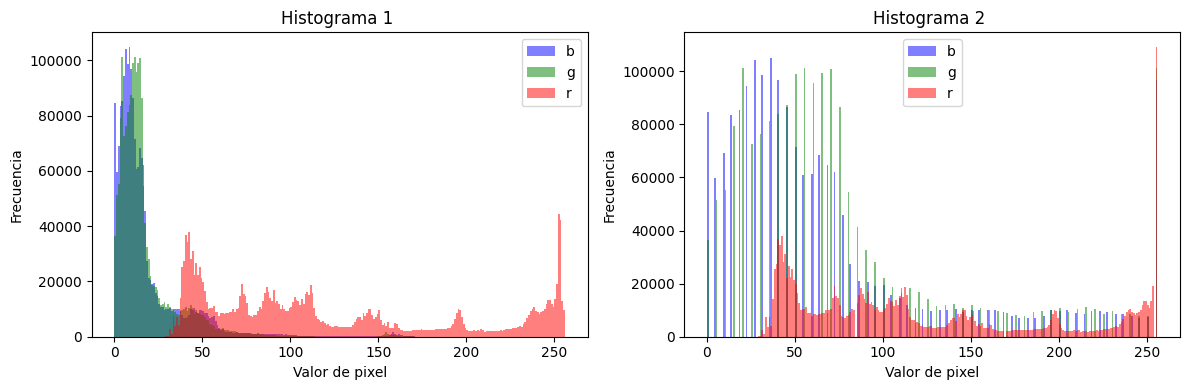

In [14]:
procesarMuestra('wp_blue.jpg', 95)